## 1. Equispaced points: comparison trapezoidal-Simpson rules

Consider the definite integral :                                               
I = Int[exp(x),0,1] = e −1 = 1.718282 . . .                                 
Write a code to calculate the integral using the (1) trapezoidal
rule or (2) the Simpson rule. In general, we indicate with Fn the
estimate of the integral from x0 to xn using a discretisation in n intervals
(even for the Simpson algorithm) of width h =(x_n -x_0)/n. Therefore:
Int[f(x),x_0,x_n]= Ftrap_n + O(h^2) = FSimpson_n + O(h^4),                     
where:                                                                  
(1)   Ftrap_n = h [1/2 f0 + f1 + . . . + fn−1 + 1/2 fn],                                                                               
(2)   FSimpson _n = h [1/3 f0 +4/3 f1 + 2/3 f2 + 4/3 f3 + . . .+4/3 fn−3 +2/3 fn−2 +4/3 fn−1 +1/3 fn].

In [1]:
def trap(f, x0, xn, n):
    h=(xn-x0)/n
    F=f(x0)/2
    x=x0+h
    for i in range(1,n):
        F=F+f(x)        
        x=x+h
    F=F+f(x)/2
    return F*h    

In [2]:
def simp(f, x0, xn, n):
    h=(xn-x0)/n
    F=f(x0)/3
    x=x0+h
    for i in range(1,n):
        if(i%2==0):
            F=F+f(x)*2/3       
        else:
            F=F+f(x)*4/3       
        x=x+h 
    F=F+f(x)/3
    return F*h    

(a) Which is the dependence on n of the error Dn = Fn − I ? You can
choose n = 2^k (with k = 2, . . . 8, at least) in order to have equispaced
points when doing a log-log plot. You should find Dn = 1/n2 for the
trapezoidal rule and Dn = 1/n4 for the Simpson rule.

In [3]:
#least squares fit
import numpy as np

def lsfit(x,y):
    if len(x)== len(y):
        n=len(x)
    else:
        print('error: array lenghts do not match')
        
    x=np.array(x)
    y=np.array(y)
    
    xm=sum(x)/n
    ym=sum(y)/n
    
    ssxx=sum(x**2)-n*xm**2
    ssxy=sum(x*y)-n*xm*ym

    m=ssxy/ssxx
    q=ym-m*xm
    
    return(m,q)

In [4]:
import numpy as np

xn=1
x0=0
res=np.exp(1)-1

n=2
kmax=10

nlst=[]
Dtrap=[]
Dsimp=[]

for k in range(kmax):
    Dtrap.append(abs(res-trap(np.exp, x0, xn, n)))
    Dsimp.append(abs(res-simp(np.exp, x0, xn, n)))
    nlst.append(n)
    n=n*2

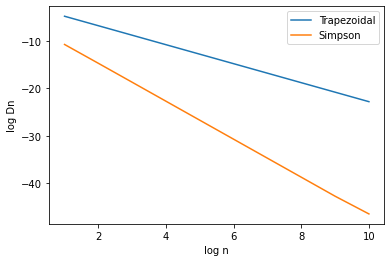

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#loglog plot
plt.plot(np.log2(nlst), np.log2(Dtrap),  label='Trapezoidal')
plt.plot(np.log2(nlst), np.log2(Dsimp),  label='Simpson')

plt.xlabel('log n')
plt.ylabel('log Dn')
plt.legend()

plt.show()

In [6]:
mt,qt=lsfit(np.log(nlst), np.log(Dtrap))
ms,qs=lsfit(np.log(nlst), np.log(Dsimp))
print('m_trap=', mt, 'm_simp=', ms)

m_trap= -1.9995965302295737 m_simp= -3.9827980699329206


## 2. Monte Carlo method: generic sample mean and importance sampling

Comparison between trapezoidal, simpson and mc sample mean method

In [7]:
import numpy as np

def MCSM(f, xi, xf, n):
    F=0
    for i in range(n):
        F=F+f(np.random.uniform(xi,xf))
    return F/n

In [8]:
import numpy as np

xn=1
x0=0
res=np.exp(1)-1

n=2
kmax=10

nlst=[]
Dtrap=[]
Dsimp=[]
Dmcsm=[]

for k in range(kmax):
    Dtrap.append(abs(res-trap(np.exp, x0, xn, n)))
    Dsimp.append(abs(res-simp(np.exp, x0, xn, n)))
    Dmcsm.append(abs(res-MCSM(np.exp, x0, xn, n)))
    nlst.append(n)
    n=n*2

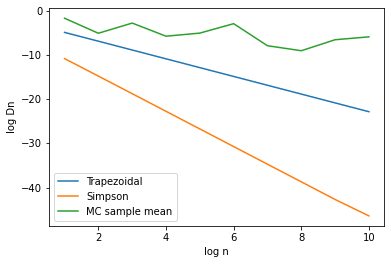

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#loglog plot
plt.plot(np.log2(nlst), np.log2(Dtrap),  label='Trapezoidal')
plt.plot(np.log2(nlst), np.log2(Dsimp),  label='Simpson')
plt.plot(np.log2(nlst), np.log2(Dmcsm),  label='MC sample mean')


plt.xlabel('log n')
plt.ylabel('log Dn')
plt.legend()

plt.show()

In [9]:
mt,qt=lsfit(np.log(nlst), np.log(Dtrap))
ms,qs=lsfit(np.log(nlst), np.log(Dsimp))
mm,qm=lsfit(np.log(nlst), np.log(Dmcsm))

print('m_trap=', mt, 'm_simp=', ms, 'm_mcsm=', mm)

m_trap= -1.9995965302295737 m_simp= -3.9827980699329206 m_mcsm= -0.32621368825868446


(a) Write a code to compute the numerical estimate Fn of 
I = Int[exp(-x^2),0,1] = sqrt(pi)/2 * erf(1) = 0.746824                              
with the MC sample mean method using a set {xi} of n random points 
uniformly distributed in [0,1]:
Fn = 1/n sum_(i=1)^n f(xi)

In [13]:
from math import erf
import numpy as np
xi=0
xf=1
res=erf(1)*np.sqrt(np.pi)/2

def gauss(x):
    return np.exp(-x**2)

a=abs(MCSM(gauss,0,1,100)-res)
b=abs(pMCSM(gauss,0,1,100)-res)

print(a,b)

0.03280043838526936 0.1928665663376773


In [32]:
def PMCSM(f, A):    #A è un array (2xN), della forma [..., [x_i, p(x_i)/N], ...], con le x_i distribuite secondo p 
    n=len(A)        #e dove N è l'integrale della distribuzione p tra x_i e x_n
    F=0
    for x,p in A:
        F=F+f(x)/p
    return F/n

import numpy as np

def unif_gen(xi,xf,n):
    A = []
    #N = (xf-xi)/(xf-xi)=1
    for i in range(n):
        A.append([np.random.uniform(xi,xf), xf-xi])
    return A

def exp_gen(xi,xf,n):
    A = []
    N = np.exp(-xi)-np.exp(-xf)
    for i in range(n):
        l=np.random.exponential(1.0)
        while l > xf or l < xi :
            l=np.random.exponential(1.0)
        A.append([l, np.exp(-l)/N])
    return A

In [33]:
from math import erf
import numpy as np

xi=0
xf=1
res = erf(1)*np.sqrt(np.pi)/2

def gauss(x):
    return np.exp(-x**2)


n=2
kmax=16

nlst=[]
Dunif=[]
Dexp=[]

for k in range(kmax):
    Aunif = unif_gen(xi,xf,n)
    Aexp = exp_gen(xi,xf,n)
    Dunif.append(abs(res-PMCSM(gauss,Aunif)))
    Dexp.append(abs(res-PMCSM(gauss,Aexp)))
    nlst.append(n)
    n=n*2

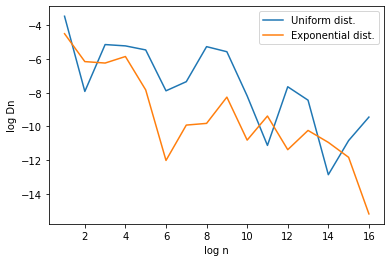

In [34]:
import matplotlib.pyplot as plt
import numpy as np

#loglog plot
plt.plot(np.log2(nlst), np.log2(Dunif),  label='Uniform dist.')
plt.plot(np.log2(nlst), np.log2(Dexp),  label='Exponential dist.')


plt.xlabel('log n')
plt.ylabel('log Dn')
plt.legend()

plt.show()

In [27]:
mu,qe=lsfit(np.log(nlst), np.log(Dunif))
me,qe=lsfit(np.log(nlst), np.log(Dexp))

print('m_unif=', mu, 'm_exp=', me)

m_unif= -0.41719204320106196 m_exp= -0.5175007680254637


(c) Compare the efficiency of the two sampling methods (uniform and
importance sampling) for the estimate of the integral by calculating
the following quantities: Fn, Sn = (< f2
i > − < fi >2)1/2, and Sn/pn,
where fi = f(xi) in the first case, and fi = f(xi)/p(xi)*int_a^b p(x)dx
in the second case (make a log-log plot of the error as a function of n: what
do you see?).

In [35]:
def S(f, A):    #A è un array (2xN), della forma [..., [x_i, p(x_i)/N], ...], con le x_i distribuite secondo p 
    n=len(A)        #e dove N è l'integrale della distribuzione p tra x_i e x_n
    F=0
    F2=0
    for x,p in A:
        F=F+f(x)/p
        F2=F2+(f(x)/p)**2
    S=np.sqrt(F2/n-(F/n)**2)
    return S

In [48]:
from math import erf
import numpy as np

xi=0
xf=1
res = erf(1)*np.sqrt(np.pi)/2

def gauss(x):
    return np.exp(-x**2)


n=2
kmax=16

nlst=[]
Sunif=[]
Sexp=[]

for k in range(kmax):
    Aunif = unif_gen(xi,xf,n)
    Aexp = exp_gen(xi,xf,n)
    Sunif.append(S(gauss,Aunif))
    Sexp.append(S(gauss,Aexp))
    nlst.append(n)
    n=n*2

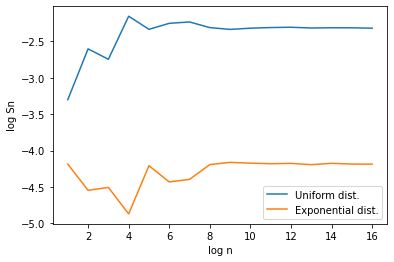

In [49]:
import matplotlib.pyplot as plt
import numpy as np

#loglog plot
plt.plot(np.log2(nlst), np.log2(Sunif),  label='Uniform dist.')
plt.plot(np.log2(nlst), np.log2(Sexp),  label='Exponential dist.')


plt.xlabel('log n')
plt.ylabel('log Sn')
plt.legend()

plt.show()

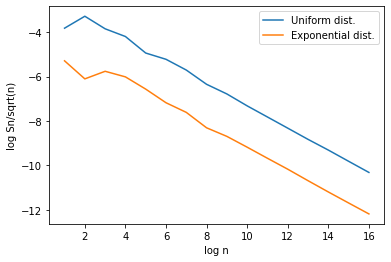

In [41]:
import matplotlib.pyplot as plt
import numpy as np

#loglog plot
plt.plot(np.log2(nlst), np.log2(Sunif/np.sqrt(nlst)),  label='Uniform dist.')
plt.plot(np.log2(nlst), np.log2(Sexp/np.sqrt(nlst)),  label='Exponential dist.')


plt.xlabel('log n')
plt.ylabel('log Sn/sqrt(n)')
plt.legend()

plt.show()

In [2]:
import numpy as np

def circ(x):
    return np.sqrt(1-x**2)


def MCSM(f, xi, xf, n):
    F=0
    for i in range(n):
        F=F+f(np.random.uniform(xi,xf))
    return F/n

In [14]:
xn=1
x0=0
res=np.pi/4
D=[]

nlst=[]
values=[10**2,10**3,10**4,10**5,10**6]

for n in values:
    D.append(abs(res-MCSM(circ, x0, xn, n)))
    nlst.append(n)

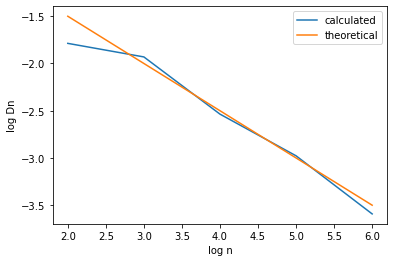

In [24]:
import matplotlib.pyplot as plt
import numpy as np

#loglog plot
plt.plot(np.log10(nlst), np.log10(D),label='calculated')
x = np.linspace(2,6,10)
y = -x/2-1/2
plt.plot(x,y, label = 'theoretical')

plt.xlabel('log n')
plt.ylabel('log Dn')
plt.legend()

plt.show()

In [21]:
m,q=lsfit(np.log(nlst), np.log(D))

print('m_unif=', m)

m_unif= -0.4656930687022437


(b) Choose in particulat n = 10^4 and consider the corresponding error
Dn. Calculate S2n =< f2 > − < f >2. 
You should recognize that
Sn CANNOT BE CONSIDERED A GOOD ESTIMATE OF THE
ERROR (it’s much larger than the actual error. . . )

In [9]:
n=10**4

A = np.random.uniform(0,1,n)

F=0
F2=0

for x in A:
    F=F+circ(x)
    F2=F2+(circ(x))**2

S=np.sqrt(F2/n-(F/n)**2)
D=abs(res-MCSM(circ, 0, 1, n))

print(S,D)

0.2230370282641928 0.00043039166473557433


(c) In order to improve the error estimate, apply the following two different
methods of variance reduction: 1) “average of the averages”:
do m =10 runs with n points each, and consider the average of the
averages and its standard deviation:
!2m
=<M2 > −<M >2
where
<M >=
1
m
Xm
↵=1
M↵ e <M2
>=
1
m
Xm
↵=1
M2↵
and M↵ is the average of each run. You should recognize that !m is
a good estimate of the error associated to each measurement (=each
run) and !m ⇡ !n/pn is the error associated to the average over the
di↵erent runs.

In [12]:
n=10**4
m=10
M=0
M2=0

for j in range(m):
    A = np.random.uniform(0,1,n)
    F=0
    for x in A:
        F=F+circ(x)

    M=M+F/n
    M2=M2+(F/n)**2

S=np.sqrt(M2/m-(M/m)**2)

print(S)

0.0021853400650065067


In [30]:
m=10
S=[]

nlst=[]
values=[2**7,2**8,2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17]

for n in values:
    M=0
    M2=0
    nlst.append(n)

    for j in range(m):
        A = np.random.uniform(0,1,n)
        F=0
        for x in A:
            F=F+circ(x)

        M=M+F/n
        M2=M2+(F/n)**2

    S.append(np.sqrt(M2/m-(M/m)**2))

print(S)

[0.013364195995529671, 0.011845372852598504, 0.014154477699746608, 0.003443372753723481, 0.0063885902168489325, 0.004344053056900651, 0.002049402178447916, 0.002128788766873488, 0.0007509806750058901, 0.0007173731664015814, 0.0003982391289562255]


In [31]:
m,q=lsfit(np.log(nlst), np.log(S))

print('m_unif=', m)

m_unif= -0.5205607792359656


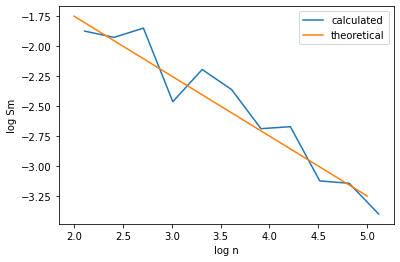

In [34]:
import matplotlib.pyplot as plt
import numpy as np

#loglog plot
plt.plot(np.log10(nlst), np.log10(S),label='calculated')
x = np.linspace(2,5,10)
y = -x/2-1/2-1/4
plt.plot(x,y, label = 'theoretical')

plt.xlabel('log n')
plt.ylabel('log Sm')
plt.legend()

plt.show()